In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# !pip install pandoc

#to ignore warning
import warnings
warnings.filterwarnings('ignore')

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 127.6/127.6 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 49.6/49.6 kB 2.6 MB/s eta 0:00:00
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33263 sha256=bfe359a157327045b0fbcd3b27959bcffd0d593616d5239443a31c3104b6039d
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\69\e6\a1\1daa96d919c9e09a71473649b717b8da286f3f8d7719d1cfc5
Successfully built pandoc


In [ ]:
#import data
df=pd.read_csv('Mall_Customers.csv',index_col=0)

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


# univariate analysis

In [ ]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
# sns.displot(df['Annual Income (k$)']);
# plt.show()

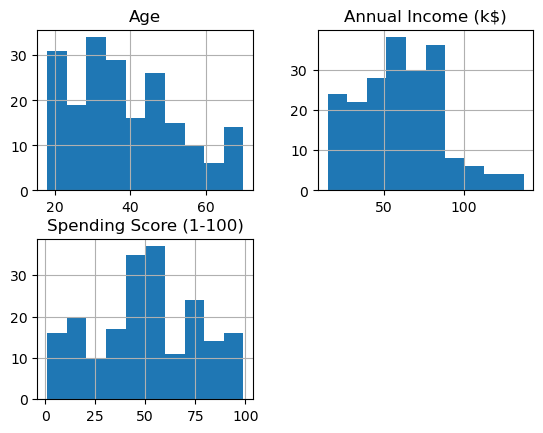

In [ ]:
df.hist()
plt.show()

In [ ]:
df.columns


Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

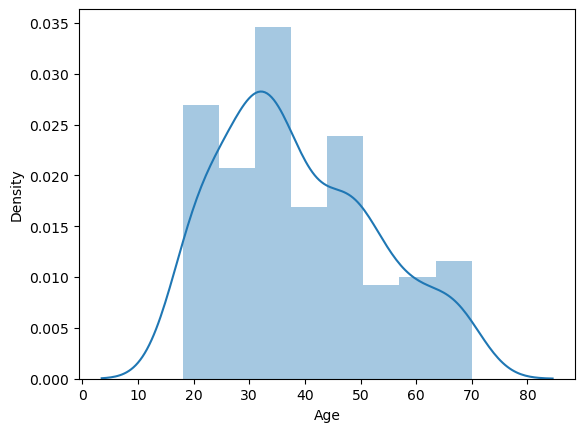

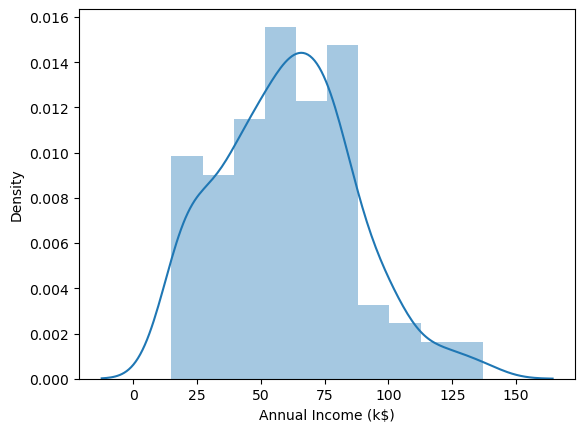

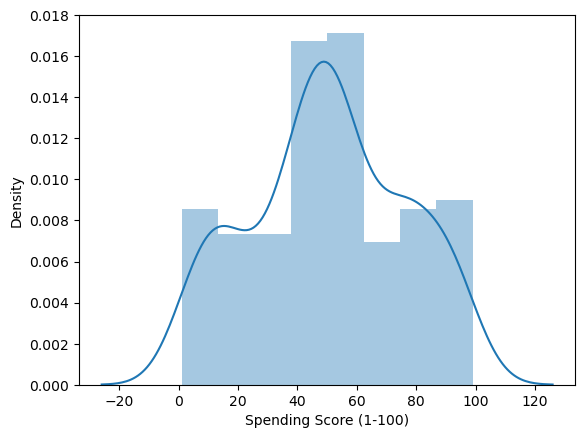

In [ ]:
columns=[ 'Age','Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])
    plt.show()

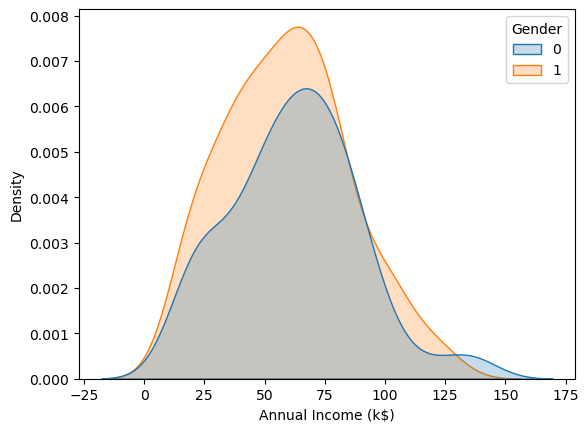

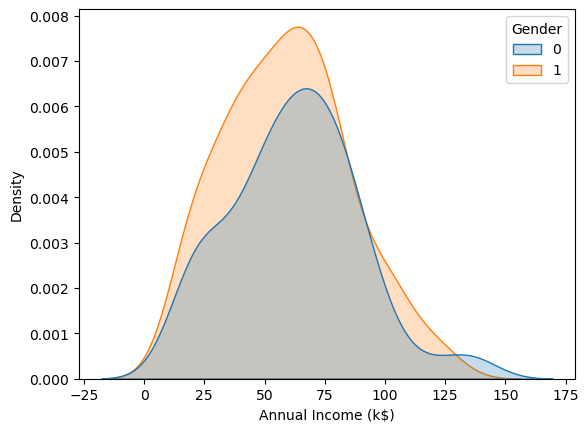

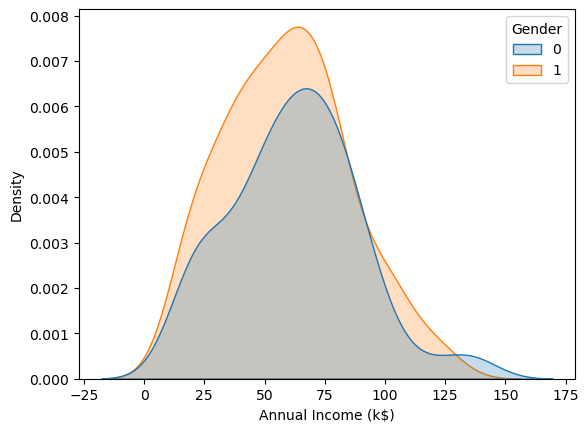

In [ ]:
for i in columns:
    plt.figure()
    sns.kdeplot(df['Annual Income (k$)'],shade=True,hue=df['Gender'])
    plt.show()
#     plt.savefig('Normal_curve-',i,'.png')

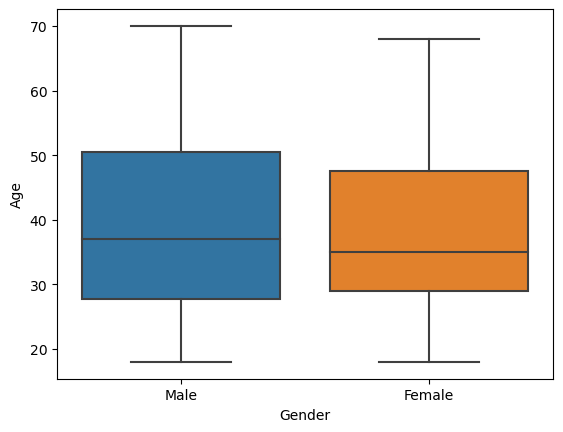

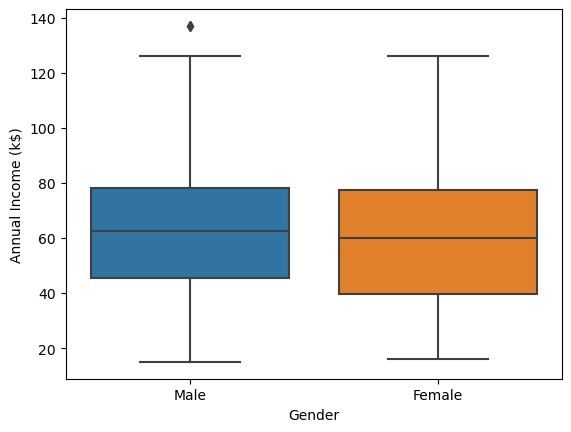

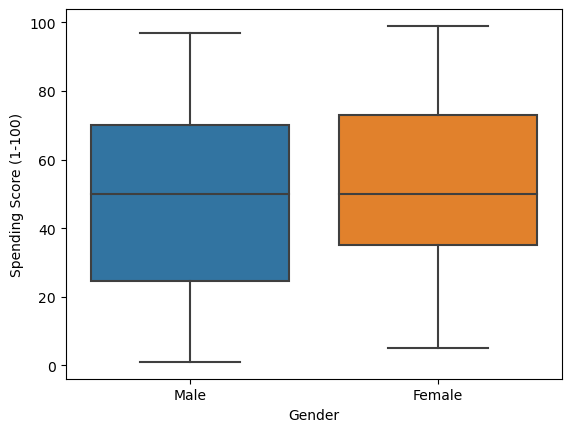

In [ ]:
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])
    plt.show()

In [ ]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

# Bivariate Analysis

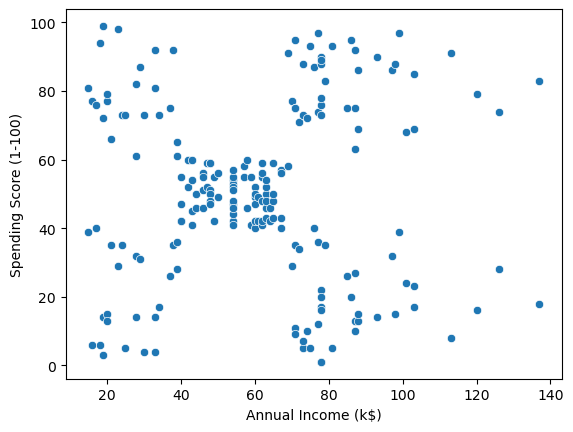

In [ ]:
columns=[ 'Age','Annual Income (k$)', 'Spending Score (1-100)']
sns.scatterplot(data=df,x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'])
plt.show()

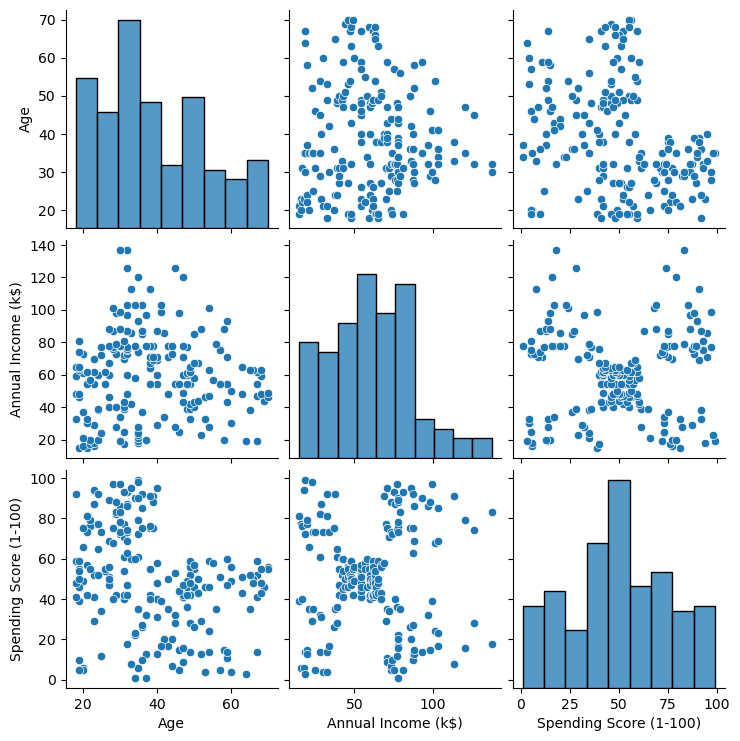

In [ ]:
sns.pairplot(df)
plt.show()

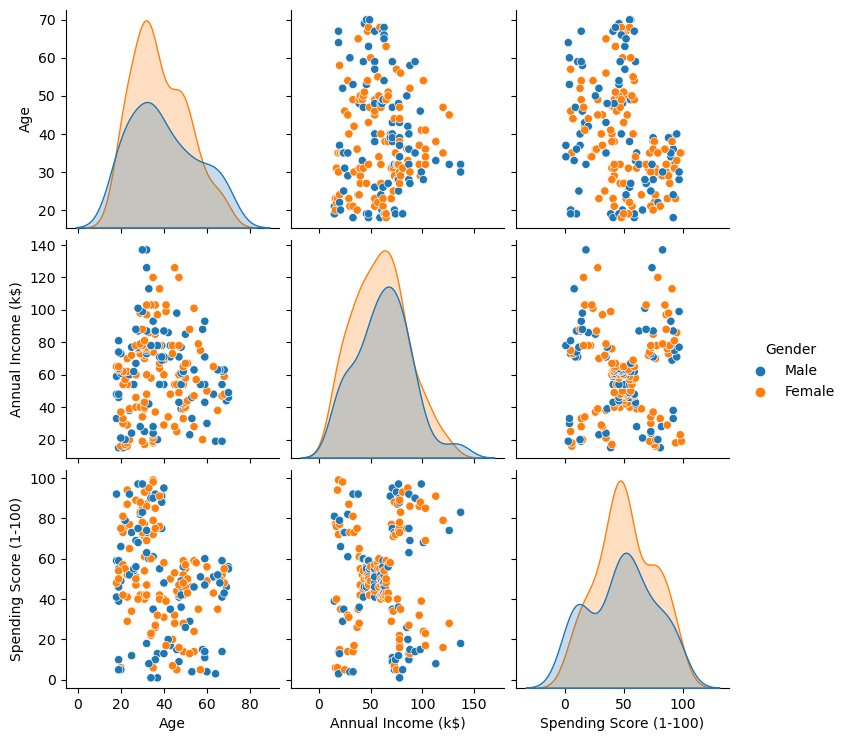

In [ ]:
sns.pairplot(df,hue='Gender')
plt.show()

In [ ]:
df.groupby(['Gender'])[ 'Age','Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [ ]:
#covariance b/w columns
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


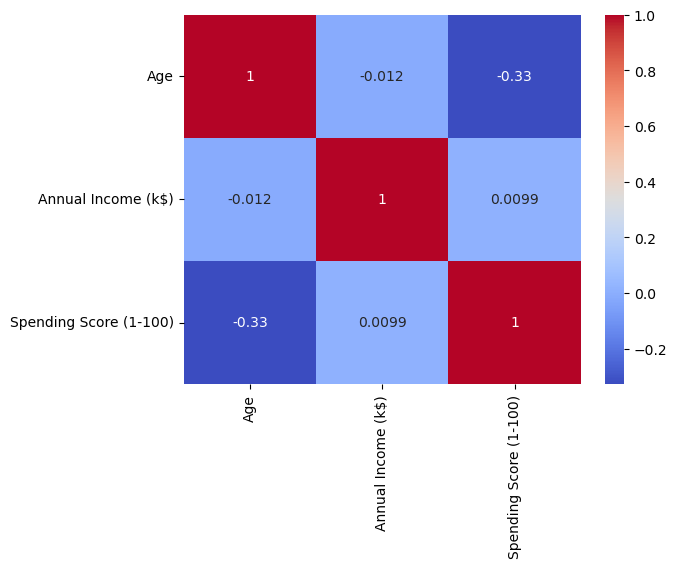

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

# clustering-Univariate,Bivariate,Multivariate

In [ ]:
cluster_1=KMeans(n_clusters=3)

In [ ]:
cluster_1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [ ]:
cluster_1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
df['Income_cluster']=cluster_1.labels_

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster
CustomerID,,,,,
1,Male,19,15,39,1
2,Male,21,15,81,1
3,Female,20,16,6,1
4,Female,23,16,77,1
5,Female,31,17,40,1


In [ ]:
#univariate clustering of income cluster

df['Income_cluster'].value_counts()

0    92
1    72
2    36
Name: Income_cluster, dtype: int64

In [ ]:
cluster_1.inertia_   #distance b/w centriod

23528.15217391304

In [ ]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)


In [ ]:
# pip install --upgrade scikit-learn numpy scipy threadpoolctl


In [ ]:
intertia_scores

[137277.27999999997,
 48660.88888888889,
 23517.330930930933,
 13278.112713472485,
 8493.229304029304,
 5050.904761904762,
 3941.4163614163617,
 2871.661599511599,
 2232.5832112332114,
 1778.9230380730382]

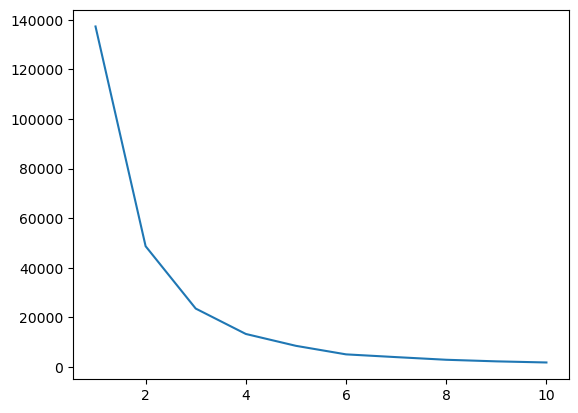

In [ ]:
plt.plot(range(1,11),intertia_scores)

In [ ]:

df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income_cluster'],
      dtype='object')

In [ ]:
df.groupby('Income_cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income_cluster,,,
0,39.184783,66.717391,50.054348
1,38.930556,33.027778,50.166667
2,37.833333,99.888889,50.638889


In [ ]:
#Bivaraiate Clustering
clustering2=KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster']=clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,Spending and Income Cluster
CustomerID,,,,,,
1,Male,19,15,39,1,2
2,Male,21,15,81,1,3
3,Female,20,16,6,1,2
4,Female,23,16,77,1,3
5,Female,31,17,40,1,2


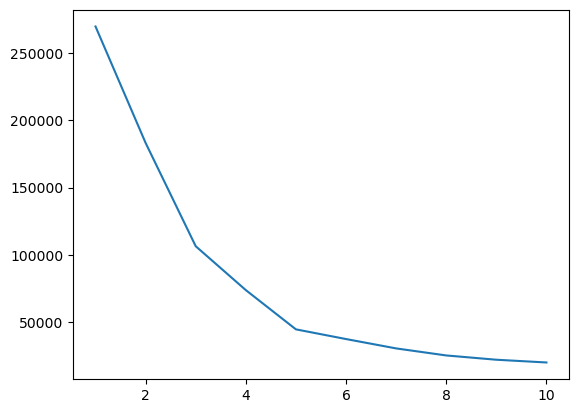

In [ ]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)
plt.savefig('BivariateClustering.png')

In [ ]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']
centers

,x,y
0,55.087500,49.712500
1,87.750000,17.583333
2,26.304348,20.913043
3,25.727273,79.363636
4,86.538462,82.128205


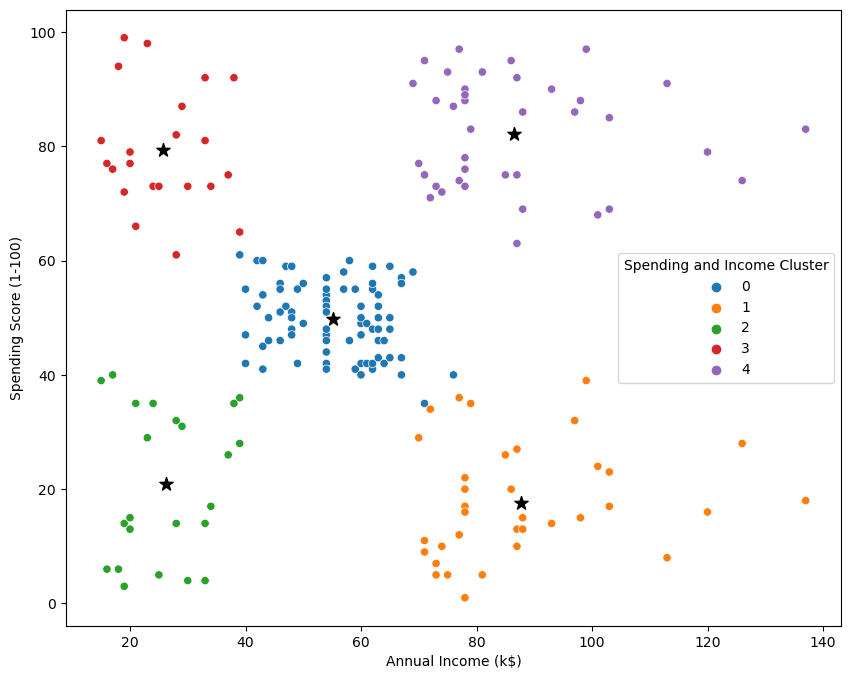

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')


In [ ]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.587500,0.412500
1,0.472222,0.527778
2,0.608696,0.391304
3,0.590909,0.409091
4,0.538462,0.461538


In [ ]:
#multivariate clustering
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()

In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,Spending and Income Cluster
CustomerID,,,,,,
1,Male,19,15,39,1,2
2,Male,21,15,81,1,3
3,Female,20,16,6,1,2
4,Female,23,16,77,1,3
5,Female,31,17,40,1,2


In [ ]:
df['Gender']=df['Gender'].map({"Male":0,"Female":1})

In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,Spending and Income Cluster
CustomerID,,,,,,
1,0,19,15,39,1,2
2,0,21,15,81,1,3
3,1,20,16,6,1,2
4,1,23,16,77,1,3
5,1,31,17,40,1,2
...,...,...,...,...,...,...
196,1,35,120,79,2,4
197,1,45,126,28,2,1
198,0,32,126,74,2,4


In [ ]:
dff = df[['Age','Gender', 'Annual Income (k$)', 'Spending Score (1-100)']]
dff.head()

,Age,Gender,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,19,0,15,39
2,21,0,15,81
3,20,1,16,6
4,23,1,16,77
5,31,1,17,40


In [ ]:
dff = scale.fit_transform(dff)

In [ ]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.128152,-1.738999,-0.434801
1,-1.281035,-1.128152,-1.738999,1.195704
2,-1.352802,0.886405,-1.700830,-1.715913
3,-1.137502,0.886405,-1.700830,1.040418
4,-0.563369,0.886405,-1.662660,-0.395980


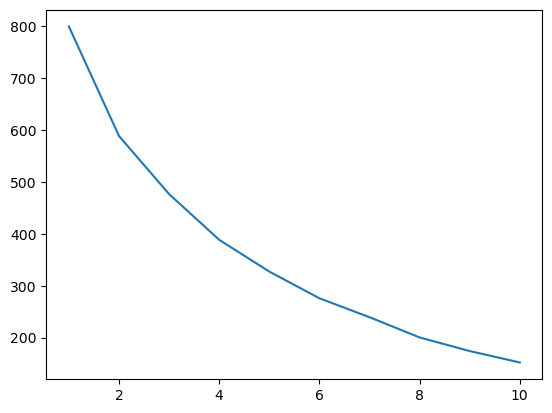

In [ ]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)

In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,Spending and Income Cluster
CustomerID,,,,,,
1,0,19,15,39,1,2
2,0,21,15,81,1,3
3,1,20,16,6,1,2
4,1,23,16,77,1,3
5,1,31,17,40,1,2
...,...,...,...,...,...,...
196,1,35,120,79,2,4
197,1,45,126,28,2,1
198,0,32,126,74,2,4


In [ ]:
df.to_csv('Clustering.csv')